In [1]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import numpy as np


GBDT Accuracy: 0.4667
GBDT Confusion Matrix:
[[56 31]
 [65 28]]
Best parameters from GridSearchCV (GBDT): {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 50}
Best Model Accuracy (GBDT): 0.5444

GBDT Feature Importances:
Feature 0: 0.2600
Feature 1: 0.1912
Feature 2: 0.1896
Feature 3: 0.1129
Feature 4: 0.2463


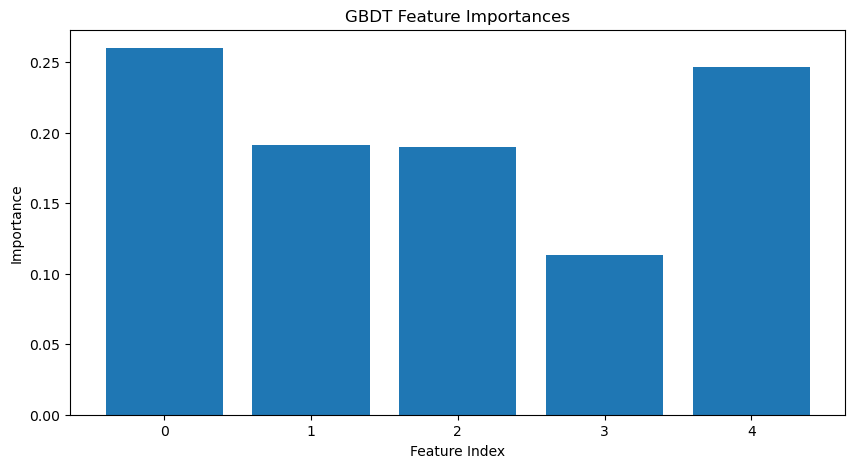

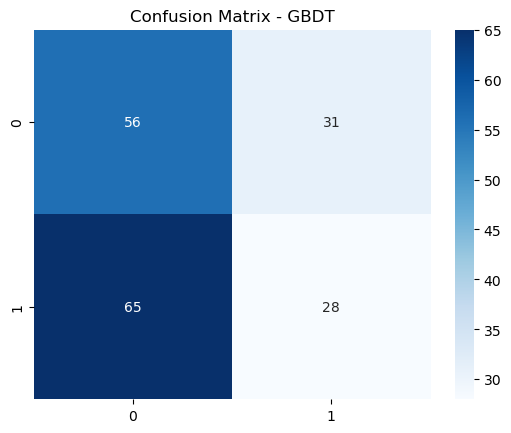


Decision Tree Rules for the First Tree in the GBDT Model:
|--- Feature 0 <= -0.58
|   |--- Feature 2 <= 0.20
|   |   |--- Feature 1 <= 0.27
|   |   |   |--- value: [-0.38]
|   |   |--- Feature 1 >  0.27
|   |   |   |--- value: [1.43]
|   |--- Feature 2 >  0.20
|   |   |--- Feature 1 <= -0.11
|   |   |   |--- value: [1.83]
|   |   |--- Feature 1 >  -0.11
|   |   |   |--- value: [0.48]
|--- Feature 0 >  -0.58
|   |--- Feature 4 <= -0.37
|   |   |--- Feature 1 <= -1.16
|   |   |   |--- value: [-1.95]
|   |   |--- Feature 1 >  -1.16
|   |   |   |--- value: [0.49]
|   |--- Feature 4 >  -0.37
|   |   |--- Feature 0 <= -0.50
|   |   |   |--- value: [-1.95]
|   |   |--- Feature 0 >  -0.50
|   |   |   |--- value: [-0.23]



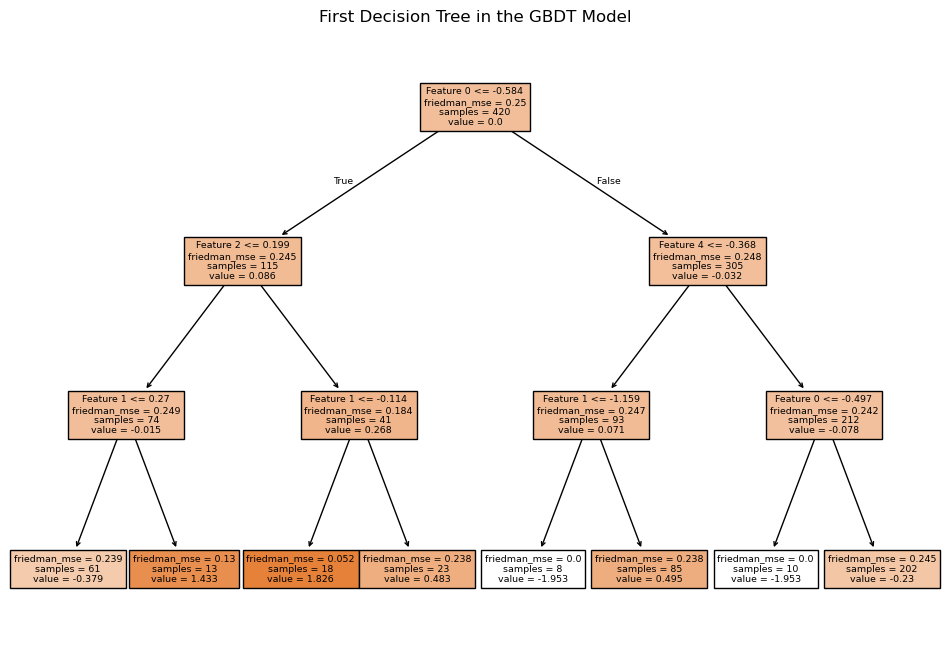

In [2]:
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import export_text, plot_tree

# Create a covariance matrix Sigma with 0.7 off-diagonal and 1 on-diagonal values
Sigma = np.full((5, 5), 0.7)
np.fill_diagonal(Sigma, 1)

# Set the random seed and generate the data
rng = np.random.default_rng(12)
X = np.concatenate(
    (
        # 200 samples from standard normal distribution (mean=0, std=1)
        rng.normal(0, 1, (200, 5)),
        
        # 200 samples from a multivariate normal distribution with the specified Sigma
        rng.multivariate_normal(np.zeros(5), Sigma, 200, method="cholesky"),
        
        # Another 200 samples from standard normal distribution (mean=0, std=1)
        rng.normal(0, 1, (200, 5)),
    ),
    axis=0
)

# Generate a synthetic binary classification target (e.g., based on random choice)
y = np.random.choice([0, 1], size=600)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ---------------------------- Train GBDT Model ---------------------------
# Train a Gradient Boosting Classifier
gbdt_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.01, max_depth=3, random_state=42)
gbdt_model.fit(X_train, y_train)

# Predictions and Evaluation for GBDT
y_pred_gbdt = gbdt_model.predict(X_test)
accuracy_gbdt = accuracy_score(y_test, y_pred_gbdt)
print(f"GBDT Accuracy: {accuracy_gbdt:.4f}")

# Confusion Matrix for GBDT
cm_gbdt = confusion_matrix(y_test, y_pred_gbdt)
print("GBDT Confusion Matrix:")
print(cm_gbdt)

# Hyperparameter tuning for GBDT (optional)
param_grid = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}
grid_search = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best Parameters from GridSearchCV for GBDT
print("Best parameters from GridSearchCV (GBDT):", grid_search.best_params_)

# Best Model Accuracy after GridSearchCV for GBDT
best_model_gbdt = grid_search.best_estimator_
y_pred_best_gbdt = best_model_gbdt.predict(X_test)
accuracy_best_gbdt = accuracy_score(y_test, y_pred_best_gbdt)
print(f"Best Model Accuracy (GBDT): {accuracy_best_gbdt:.4f}")

# ------------------------------- Feature Importance -------------------------------
# Feature Importance from GBDT
importances_gbdt = gbdt_model.feature_importances_
print("\nGBDT Feature Importances:")
for i, importance in enumerate(importances_gbdt):
    print(f"Feature {i}: {importance:.4f}")

# Plot Feature Importances from GBDT
plt.figure(figsize=(10, 5))
plt.bar(range(X.shape[1]), importances_gbdt)
plt.title('GBDT Feature Importances')
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.show()

# ------------------------- Plot Confusion Matrix --------------------------
# Plot Confusion Matrix for GBDT
sns.heatmap(cm_gbdt, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix - GBDT')
plt.show()

# --------------------- Decision Tree Rules from GBDT ---------------------

# Extract and print the rules of the first decision tree in the GBDT ensemble
print("\nDecision Tree Rules for the First Tree in the GBDT Model:")
tree_rules = export_text(gbdt_model.estimators_[0, 0], feature_names=[f"Feature {i}" for i in range(X.shape[1])])
print(tree_rules)

# Visualize the first decision tree in the GBDT model
plt.figure(figsize=(12, 8))
plot_tree(gbdt_model.estimators_[0, 0], filled=True, feature_names=[f"Feature {i}" for i in range(X.shape[1])], class_names=["0", "1"])
plt.title("First Decision Tree in the GBDT Model")
plt.show()
